### Ideas

- climate and changes
    - temperature
    - precipitation
    - humidity
- coffee production quantity
- coffee price
    - retail
    - profit for growers
- people employed in coffee growing industry
    - in efforts to keep costs down, what practices might farms use?
        - child labor (https://humantraffickingsearch.org/there-could-be-labor-exploitation-in-your-coffee-cup-heres-how-it-got-there/)
- consumption habits / demand
    - how much coffee people are drinking 
    
1990-2020 ()

TO-DO:
* convert prod_df rows and column switch
* get export prices per year for top 10 countries

We have: 
- production 
    - by top countries
    - global
- us retail price
- change in temp annual
- change in temp from mean

we need:
- export price per country
    - globally
- us demand

Look at: 
coffee quality over time
coffee production losses

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Production

In [2]:
# prod_df = pd.read_csv('data/production.csv')
# prod_df.shape

In [3]:
# prod_df.isnull().sum()

### Global Warming

In [5]:
global_warming_df = pd.read_csv('data/global_temp_change.csv')
global_warming_df.head(3)

,year,global_change_in_celsius
0,1980,0.32
1,1981,0.53
2,1982,0.12


In [6]:
# Visualizing overall global warming trends
plt.scatter(global_warming_df['Year'], global_warming_df['Value']);

KeyError: 'Year'

In [ ]:
# Isolating just Brazil from full countries dataframe:
brazil_climate_change = global_warming_df[global_warming_df['Area'] == 'Brazil'].copy()
brazil_climate_change.head()

In [ ]:
# I don't want the individual monthly change, so just isolating temp change yearly:
brazil_climate_change = brazil_climate_change[brazil_climate_change['Months'] == 'Meteorological year']

In [ ]:
# Only looking at years 1990-2020:
brazil_climate_change = brazil_climate_change[brazil_climate_change['Year'] >= 1990]
brazil_climate_change.shape

In [ ]:
# Only need year and temp change:
brazil_climate_change = brazil_climate_change[['Year', 'Value']]
brazil_climate_change.head(3)

In [ ]:
# Renaming column to be in right format and more descriptive:
brazil_climate_change.rename(columns={'Value':'B_temp_change'},inplace=True)

In [ ]:
# Quick visual of trends:
plt.scatter(brazil_climate_change['Year'], brazil_climate_change['B_temp_change']);

### Retail Prices:

In [ ]:
retail_prices = pd.read_excel('data/3b - retail_prices.xlsx')

In [ ]:
# cleaning column names by snakecasing and strpping blankspace
retail_prices.columns = [col.lower().strip().replace(' ','_') 
                         for col in retail_prices.columns]
# shortening usa name
retail_prices.rename(columns={'united_states_of_america':'usa_retail_price'},inplace=True)

In [ ]:
retail_prices.head()

In [ ]:
# Isolating just year and retail prices:
us_retail_price = retail_prices[['year', 'usa_retail_price']].copy()
us_retail_price.tail()

In [ ]:
# Renaming column to be in correct format:
us_retail_price.rename(columns={'year': 'Year'}, inplace=True)
us_retail_price.info()

### US Coffee Consumption

In [ ]:
us_consumption = pd.read_excel('data/us_coffee_consumption.xlsx')
us_consumption.head(5)

In [ ]:
# modifying rows to be correct values (removing incorrect info and fixing column names)
us_consumption.drop([0, 1, 32, 33, 34, 35], inplace=True)
us_consumption.columns = ('Year', 'Thousand Units (Bags of 60 kg)')
us_consumption.head()

In [ ]:
us_consumption.info()

In [ ]:
# Changing quantity to numeric type
us_consumption['Thousand Units (Bags of 60 kg)'] = pd.to_numeric(us_consumption['Thousand Units (Bags of 60 kg)'])
us_consumption['Year'] = pd.to_numeric(us_consumption['Year'])
us_consumption.describe()

### Green Coffee Net Production Brazil

In [ ]:
brazil_grn_coffee = pd.read_excel('data/Brazil/Green Coffee Net Production in Brazil.xlsx')
brazil_grn_coffee.head(3)

In [ ]:
# modifying rows to be correct values (removing incorrect info and fixing column names)
brazil_grn_coffee.drop([0, 1, 61, 62, 63, 64], inplace=True)
brazil_grn_coffee.columns = ('Year', 'B_thousand_USD_grn_coffee_prod')
brazil_grn_coffee.head()

In [ ]:
brazil_grn_coffee.info()

In [ ]:
# Changing quantity to numeric type
brazil_grn_coffee['B_thousand_USD_grn_coffee_prod'] = pd.to_numeric(brazil_grn_coffee['B_thousand_USD_grn_coffee_prod'])
brazil_grn_coffee['Year'] = pd.to_numeric(brazil_grn_coffee['Year'])
brazil_grn_coffee.describe()

### Brazil Temp

In [ ]:
brazil_temp = pd.read_csv('data/Brazil/observed-average-annual-mean-temperature-of-brazil-for-1901-2021.csv')
brazil_temp.drop(columns='5-yr smooth', inplace=True)
brazil_temp.head()

In [ ]:
# Renaming category column to be in right formats:
brazil_temp.rename(columns={'Category': 'Year', 'Annual Mean':'B_annual_avg_temp'}, inplace=True)
brazil_temp.head(3)

### Brazil production

In [ ]:
brazil_prod = pd.read_csv('data/Brazil/brazil_FAOSTAT_production.csv')
brazil_prod.head(3)

In [ ]:
# Isolating just needed columns:
brazil_prod.drop(columns=['Domain Code', 'Domain', 'Area Code (FAO)', 'Item Code (FAO)', 'Year Code', 'Flag'], inplace=True)
brazil_prod.head(3)

In [ ]:
brazil_prod.Element.unique()

In [ ]:
# Splitting vertical dataframe into three sections so I can get the columns arranged
# Dropping unnecessary columns and renaming to correct format:

area_harvested = brazil_prod[brazil_prod['Element'] == 'Area harvested'].copy()
area_harvested.drop(columns=['Area', 'Element Code', 'Element', 
                             'Item', 'Flag Description', 'Unit'], inplace=True)
area_harvested.columns = ['Year', 'B_hectares_harvested']
area_harvested.head()

In [ ]:
# Same as above:

yields = brazil_prod[brazil_prod['Element'] == 'Yield'].copy()
yields.drop(columns=['Area', 'Element Code', 'Element', 'Item', 'Flag Description', 'Unit'], inplace=True)
yields.columns = ['Year', 'B_hectograms_per_hectare_yield']
yields.tail()

In [ ]:
# Same as above two

brazil_production = brazil_prod[brazil_prod['Element'] == 'Production'].copy()
brazil_production.drop(columns=['Area', 'Element Code', 'Element', 'Item', 'Flag Description', 'Unit'], inplace=True)
brazil_production.columns = ['Year', 'B_tonnes_produced']
brazil_production.head()

## Merging:

In [ ]:
first = pd.merge(area_harvested, yields, how='outer', on='Year')
first.tail(3)

In [ ]:
second = pd.merge(first, brazil_production, how='outer', on='Year')
second.tail(3)

In [ ]:
retail_consumption = pd.merge(us_retail_price, us_consumption, how='outer', on='Year')
retail_consumption.tail(3)

In [ ]:
retail_consump_grn = pd.merge(retail_consumption, brazil_grn_coffee, on='Year')
retail_consump_grn.tail(3)

In [ ]:
all_four = pd.merge(retail_consump_grn, brazil_temp, on='Year')
all_four.tail(3)

In [ ]:
brazil_df = pd.merge(second, all_four, how='outer', on='Year')
brazil_df.head()

In [ ]:
brazil_df = pd.merge(brazil_df, brazil_climate_change, on='Year')

In [ ]:
brazil_df.info()

In [ ]:
sns.pairplot(brazil_df, corner=True);

In [ ]:
brazil_df.columns

In [ ]:
# *Commenting out to prevent accidently running and rewriting*

# brazil_df.to_csv('./data/brazil_df.csv', index=False)

SOURCES:

us_coffee_consumption - https://www.nationmaster.com/nmx/ranking/coffee-consumption

brazil green coffee net production - https://www.nationmaster.com/nmx/timeseries/brazil-green-coffee-net-production

brazil weather - https://climateknowledgeportal.worldbank.org/country/brazil/climate-data-historical

brazil production more detailed - https://www.fao.org/faostat/en/#data/QCL


In [ ]:
cleaned_merged_df = pd.read_csv('./data/cleaned_merged_df.csv')
cleaned_merged_df.head()

In [ ]:
cleaned_merged_df['b_annual_celsius_change'] = brazil_df['B_temp_change']
cleaned_merged_df.head()

In [ ]:
# *Commenting out to prevent accidently running and rewriting*

# cleaned_merged_df.to_csv('./data/cleaned_merged_df.csv', index=False)

# Final DataFrame Visualizations:

In [37]:
updated = pd.read_csv('./data/cleaned_merged_df4.csv')

In [38]:
updated.head(3)

,Unnamed: 0,year,b_prod_lbs,ind_annual_celcsius_change,ind_avg_temp_celsius,ind_prod_lbs,b_hectares_harvested,b_hectograms_per_hectare_yield,b_tonnes_produced,usa_retail_price,...,col_annual_celsius_change,global_change_in_celsius,e_prod,e_temp_change,e_export,e_consumption,us_consumption_lbs,col_avg_temp_celsius,b_annual_celsius_change,e_avg_temp
0,0,1990,60028382.92,0.120,25.43,16371042.6,2908960,5036,1464856,2.97,...,0.258,0.66,2909.451,0.244,1074.101,1200.0,40254757.4,24.77,0.440,23.04
1,1,1991,60045685.48,0.203,25.32,18685031.2,2763440,5502,1520382,2.81,...,0.347,0.53,2924.664,0.244,841.329,1264.0,41054596.0,24.82,0.470,23.13
2,2,1992,76127379.24,0.264,25.28,12252851.6,2500320,5177,1294373,2.58,...,0.532,0.25,1825.171,0.244,734.461,1331.0,40238996.6,24.95,0.381,22.79


In [39]:
updated.drop(columns=['Unnamed: 0'], inplace=True)

In [49]:
updated.rename({'ind_annual_celcsius_change': 'ind_annual_celsius_change'}, axis='columns', inplace=True)

In [50]:
updated.head(3)

,year,b_prod_lbs,ind_annual_celsius_change,ind_avg_temp_celsius,ind_prod_lbs,b_hectares_harvested,b_hectograms_per_hectare_yield,b_tonnes_produced,usa_retail_price,b_annual_avg_temp,...,col_annual_celsius_change,global_change_in_celsius,e_prod,e_temp_change,e_export,e_consumption,us_consumption_lbs,col_avg_temp_celsius,b_annual_celsius_change,e_avg_temp
0,1990,60028382.92,0.120,25.43,16371042.6,2908960,5036,1464856,2.97,25.12,...,0.258,0.66,2909.451,0.244,1074.101,1200.0,40254757.4,24.77,0.440,23.04
1,1991,60045685.48,0.203,25.32,18685031.2,2763440,5502,1520382,2.81,25.05,...,0.347,0.53,2924.664,0.244,841.329,1264.0,41054596.0,24.82,0.470,23.13
2,1992,76127379.24,0.264,25.28,12252851.6,2500320,5177,1294373,2.58,24.91,...,0.532,0.25,1825.171,0.244,734.461,1331.0,40238996.6,24.95,0.381,22.79


''

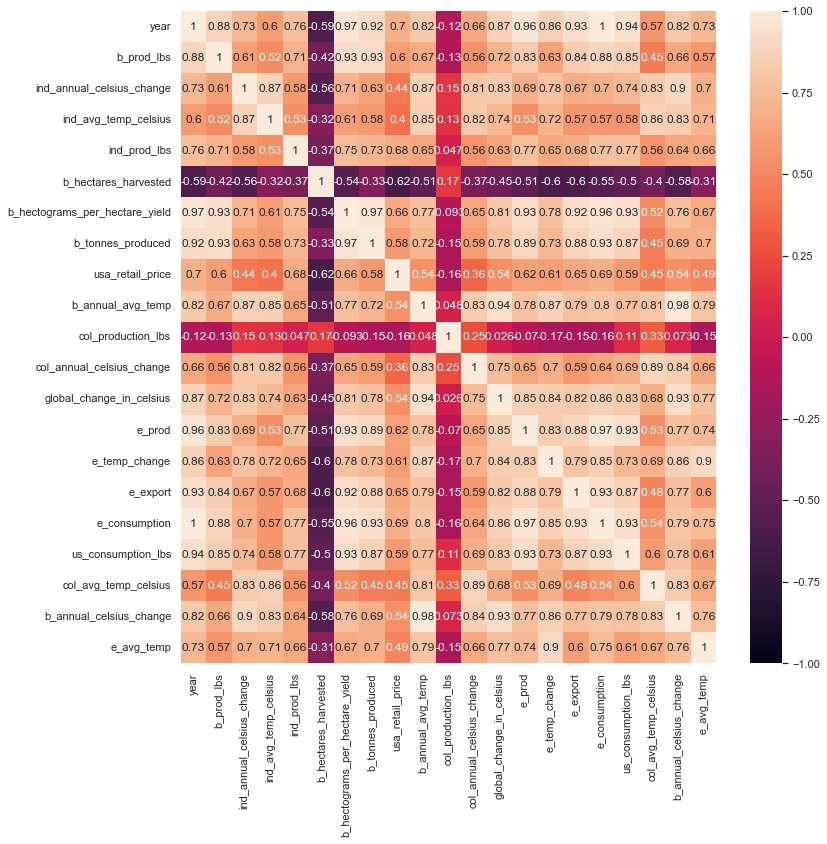

In [55]:
plt.figure(figsize=(12,12))
sns.heatmap(updated.corr(), vmin=-1, annot=True)
;

In [51]:
temp_changes= updated[['ind_annual_celsius_change', 'col_annual_celsius_change', 'e_temp_change',
                       'b_annual_celsius_change', 'global_change_in_celsius']]

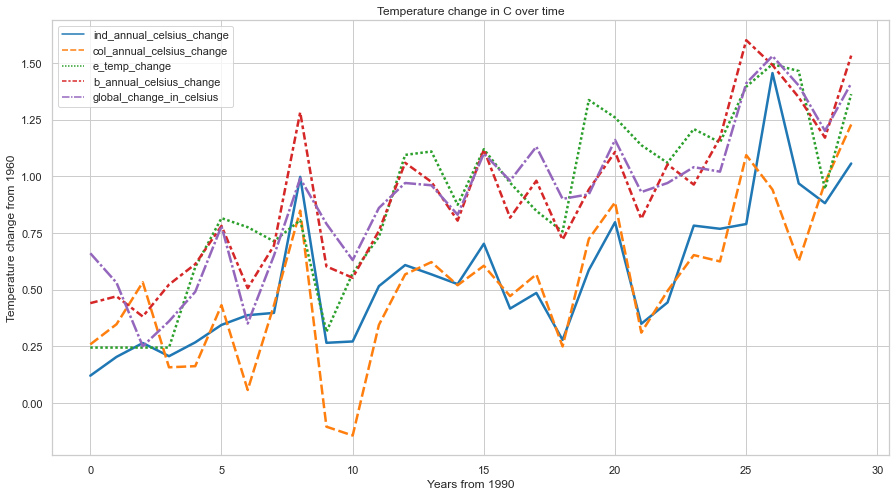

In [52]:
# Looking at all temperature changes:

sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,8))
plt.xlabel('Years from 1990')
plt.ylabel('Temperature change from 1960')
sns.lineplot(data=temp_changes, palette="tab10", linewidth=2.5).set(title='Temperature change in C over time');

In [63]:
updated.columns

Index(['year', 'b_prod_lbs', 'ind_annual_celsius_change',
       'ind_avg_temp_celsius', 'ind_prod_lbs', 'b_hectares_harvested',
       'b_hectograms_per_hectare_yield', 'b_tonnes_produced',
       'usa_retail_price', 'b_annual_avg_temp', 'col_production_lbs',
       'col_annual_celsius_change', 'global_change_in_celsius', 'e_prod',
       'e_temp_change', 'e_export', 'e_consumption', 'us_consumption_lbs',
       'col_avg_temp_celsius', 'b_annual_celsius_change', 'e_avg_temp'],
      dtype='object')

In [70]:
updated['e_prod_lbs'] = [(each*1000)*2.2 for each in updated['e_export']]

In [71]:
prod_changes = updated[['b_prod_lbs', 'ind_prod_lbs', 'col_production_lbs', 'e_prod_lbs']]

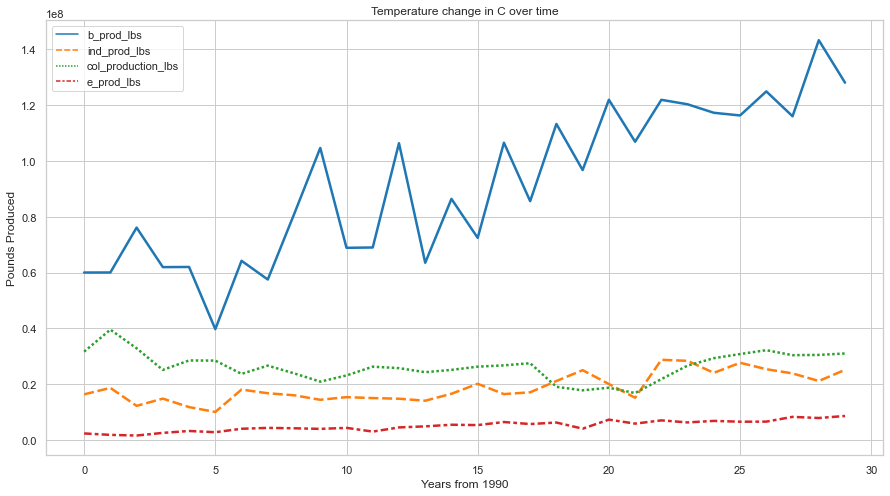

In [72]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,8))
plt.xlabel('Years from 1990')
plt.ylabel('Pounds Produced')
sns.lineplot(data=prod_changes, palette="tab10", linewidth=2.5).set(title='Temperature change in C over time');

In [ ]:
# Looking at temp changes versus production

# See tableau
